# 数据绘图要点3-意大利面条图

线条太多的折线图通常变的不可读，这种图一般被称为意大利面条图。因此这种图几乎无法提供有关数据的信息。

## 绘图实例

让我们以美国从1880年到2015年女性婴儿名字的演变为例。

In [11]:
# Libraries
library(tidyverse)
library(hrbrthemes)
library(kableExtra)
library(babynames)
library(viridis)
library(DT)
library(plotly)

In [12]:
# 展示数据
data <- babynames
head(data)
nrow(data)

year,sex,name,n,prop
<dbl>,<chr>,<chr>,<int>,<dbl>
1880,F,Mary,7065,0.07238359
1880,F,Anna,2604,0.02667896
1880,F,Emma,2003,0.02052149
1880,F,Elizabeth,1939,0.01986579
1880,F,Minnie,1746,0.01788843
1880,F,Margaret,1578,0.01616720


[1] 1924665

In [13]:
# 挑选某些姓名的数据
data = filter(data,name %in% c("Mary","Emma", "Ida", "Ashley", "Amanda", "Jessica", "Patricia", "Linda", "Deborah",   "Dorothy", "Betty", "Helen"))
head(data)
nrow(data)

year,sex,name,n,prop
<dbl>,<chr>,<chr>,<int>,<dbl>
1880,F,Mary,7065,0.07238359
1880,F,Emma,2003,0.02052149
1880,F,Ida,1472,0.01508119
1880,F,Helen,636,0.00651606
1880,F,Amanda,241,0.00246914
1880,F,Betty,117,0.00119871


[1] 2599

In [14]:
# 只要女性数据
data= filter(data,sex=="F")
head(data)
nrow(data)

year,sex,name,n,prop
<dbl>,<chr>,<chr>,<int>,<dbl>
1880,F,Mary,7065,0.07238359
1880,F,Emma,2003,0.02052149
1880,F,Ida,1472,0.01508119
1880,F,Helen,636,0.00651606
1880,F,Amanda,241,0.00246914
1880,F,Betty,117,0.00119871


[1] 1593

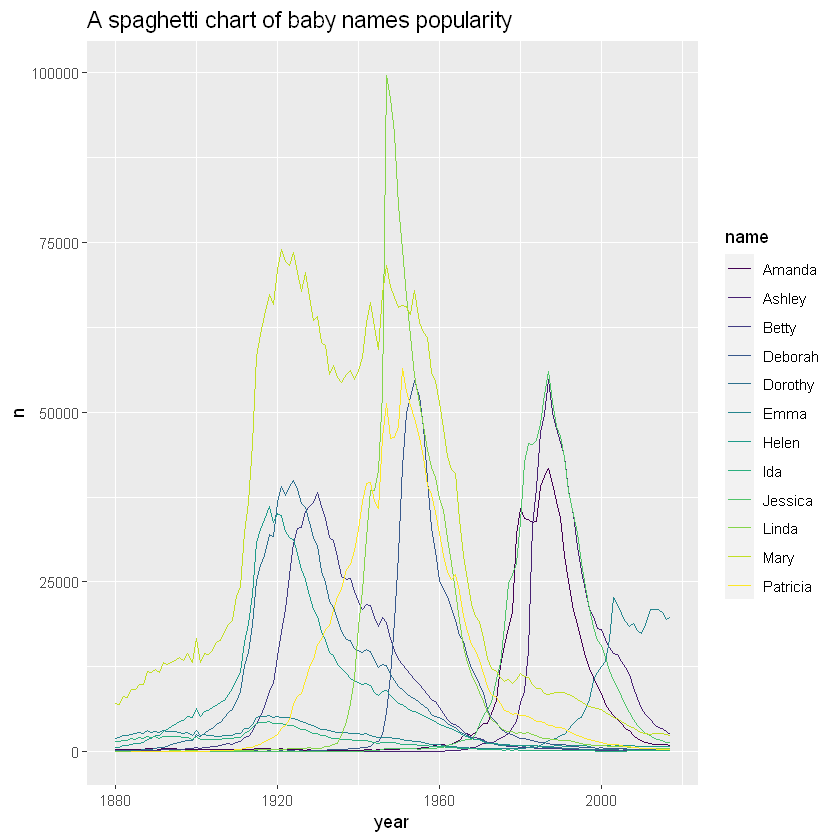

In [15]:
# 绘图
ggplot(data,aes(x=year, y=n, group=name, color=name)) +
geom_line() +
scale_color_viridis(discrete = TRUE) +
theme(
  plot.title = element_text(size=14)
) +
ggtitle("A spaghetti chart of baby names popularity")

从图中看到很难按照一条线来理解特定名称受欢迎程度的演变。另外，即使您设法遵循一条线显示结果，您也需要将其与更难的图例联系起来。让我们尝试找到一些解决方法来改进此图形。

## 改进方法

### 针对特定群体

 假设您绘制了许多组，但实际原因是为了解释一个特定组与其他组相比的特征。然后一个好的解决方法是突出显示这个组：让它看起来不同，并给它一个适当的注释。在这里，Amanda的人气演变是显而易见的。保留其他名称很重要，因为它允许您将 Amanda 与所有其他名称进行比较

In [16]:
# 添加数据项
data =  mutate( data, highlight=ifelse(name=="Amanda", "Amanda", "Other"))
head(data)

year,sex,name,n,prop,highlight
<dbl>,<chr>,<chr>,<int>,<dbl>,<chr>
1880,F,Mary,7065,0.07238359,Other
1880,F,Emma,2003,0.02052149,Other
1880,F,Ida,1472,0.01508119,Other
1880,F,Helen,636,0.00651606,Other
1880,F,Amanda,241,0.00246914,Amanda
1880,F,Betty,117,0.00119871,Other


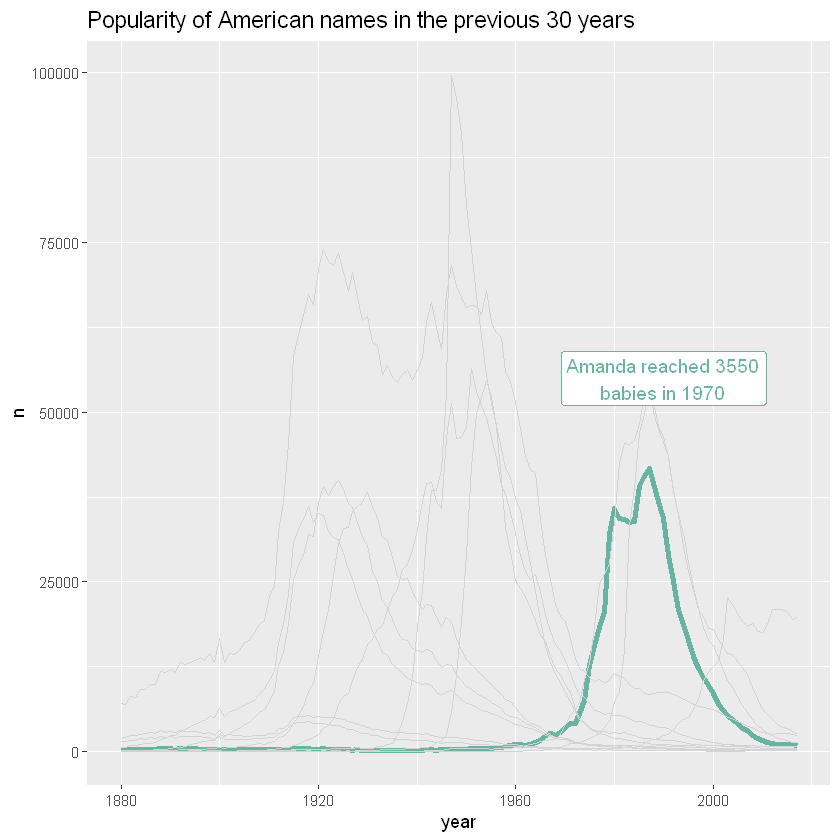

In [17]:
ggplot(data,aes(x=year, y=n, group=name, color=highlight, size=highlight)) +
geom_line() +
scale_color_manual(values = c("#69b3a2", "lightgrey")) +
scale_size_manual(values=c(1.5,0.2)) +
theme(legend.position="none") +
ggtitle("Popularity of American names in the previous 30 years") +
geom_label( x=1990, y=55000, label="Amanda reached 3550\nbabies in 1970", size=4, color="#69b3a2") +
theme(,
  plot.title = element_text(size=14)
)

### 使用子图

面积图可用于对数据集进行更全面的概述，尤其是与子图结合使用时。在下面的图表中，可以很容易地瞥见任何名称的演变情况：



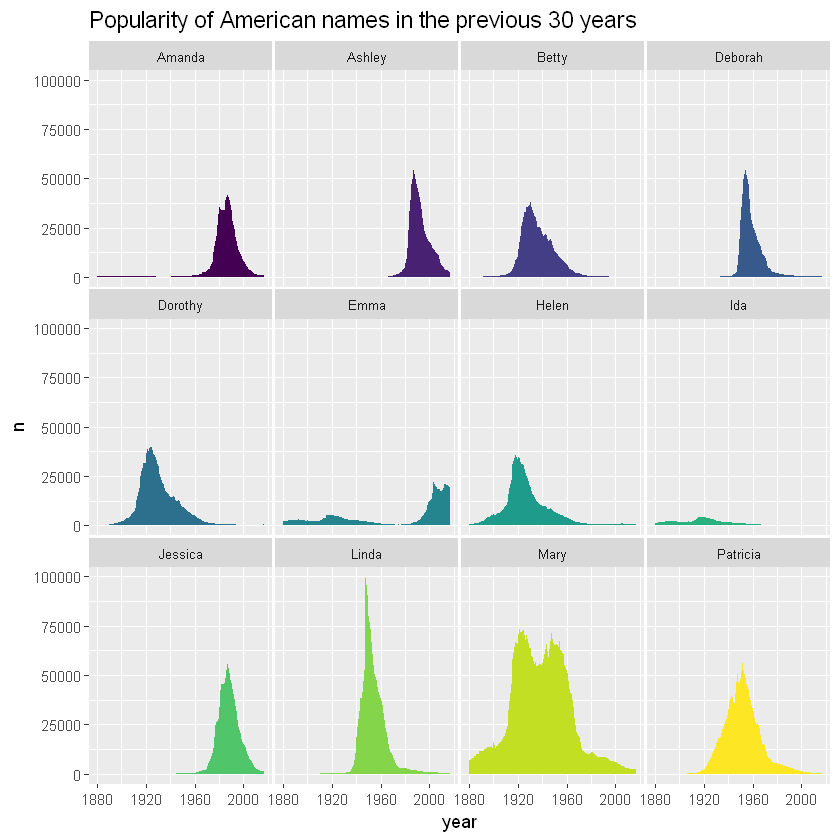

In [18]:
ggplot(data,aes(x=year, y=n, group=name, fill=name)) +
geom_area() +
scale_fill_viridis(discrete = TRUE) +
theme(legend.position="none") +
ggtitle("Popularity of American names in the previous 30 years") +
theme(
  panel.spacing = unit(0.1, "lines"),
  strip.text.x = element_text(size = 8),
  plot.title = element_text(size=14)
) +
# 按名字分图
facet_wrap(~name)

从图上可以看到，Linda这个名字在很短的时间内是一个非常受欢迎的名字。另一方面，Ida 从来都不是很受欢迎，在几十年中较少被使用。

### 组合方法

如果您想比较每条线与其他线的演变情况，您可以将针对特定群体和使用子图结合起来

In [19]:
# 复制列，name/name2分别有不同用处，一个用于显示子图中的数据，一个用于分列
tmp <- data %>%
  mutate(name2=name)
head(tmp)

year,sex,name,n,prop,highlight,name2
<dbl>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
1880,F,Mary,7065,0.07238359,Other,Mary
1880,F,Emma,2003,0.02052149,Other,Emma
1880,F,Ida,1472,0.01508119,Other,Ida
1880,F,Helen,636,0.00651606,Other,Helen
1880,F,Amanda,241,0.00246914,Amanda,Amanda
1880,F,Betty,117,0.00119871,Other,Betty


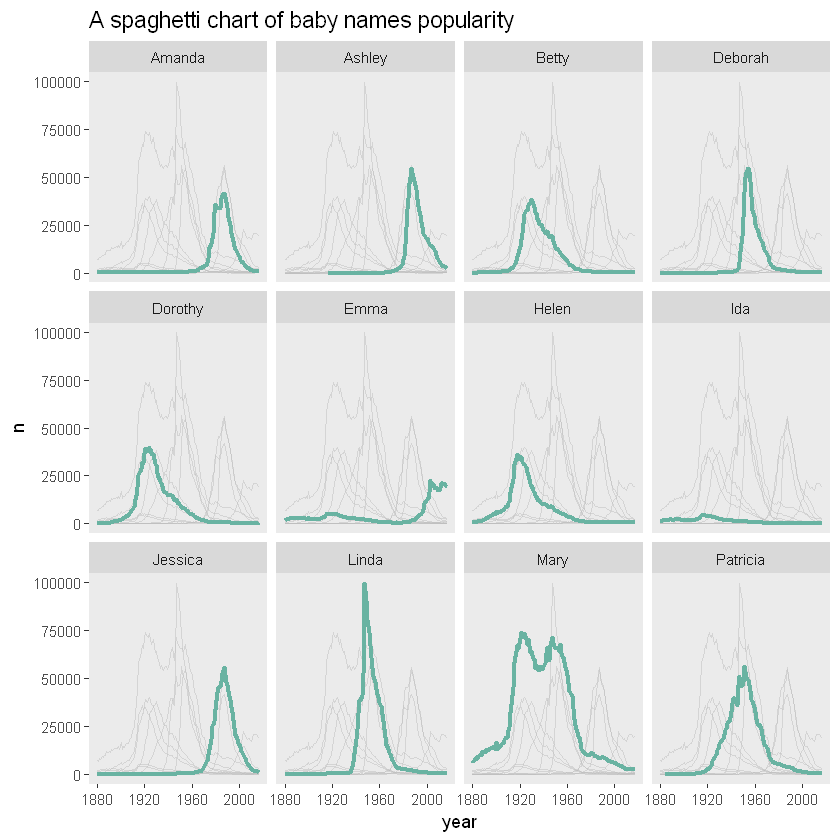

In [20]:
tmp %>%
ggplot( aes(x=year, y=n)) +
# 用name2显示数据
geom_line( data=tmp %>% dplyr::select(-name), aes(group=name2), color="grey", size=0.5, alpha=0.5) +
geom_line( aes(color=name), color="#69b3a2", size=1.2 )+
scale_color_viridis(discrete = TRUE) +
theme(
  legend.position="none",
  plot.title = element_text(size=14),
  panel.grid = element_blank()
) +
ggtitle("A spaghetti chart of baby names popularity") +
# 用name分图
facet_wrap(~name)

## 参考

+ [THE SPAGHETTI PLOT](https://www.data-to-viz.com/caveat/spaghetti.html)